# **Aprendizaje supervisado**
# SL16. Tarea Final

A continuación se entregan una serie de datasets. Para cada uno de ellos construya TRES (3) modelos de aprendizaje supervisado y compare sus resultados.

## <font color='blue'>**Set de Datos Boston Housing**</font>

El objetivo es poder predecir a nivel de negocio, el valor promedio de una propiedad en miles de dólares (US$1000) en la ciudad de Boston y que corresponde a la variable **MEDV**.

Informacion de los atributos   
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per \$10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    \% lower status of the population
14. MEDV     Median value of owner-occupied homes in \$1000's (target)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lee un archivo CSV directamente de una URL y guarda los resultados
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names=['CRIM','ZN','INDUS','CHAS','NOS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv(url,delimiter='\s+', header=None, names=names)
#data = pd.read_csv(url,delim_whitespace=True, header = None)

# Muestra las 5 primeras filas
df.head()

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Tamaño del dataset
df.shape

(506, 14)

In [ ]:
# Valores nulos del dataset
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOS        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# numero de valores distintos en cada columna del dataset
for columna in df.columns:
    num_valores_distintos = df[columna].nunique()
    print(f"{columna}: {num_valores_distintos}")

CRIM: 504
ZN: 26
INDUS: 76
CHAS: 2
NOS: 81
RM: 446
AGE: 356
DIS: 412
RAD: 9
TAX: 66
PTRATIO: 46
B: 357
LSTAT: 455
MEDV: 229


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOS,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


1. Realice 3 visualizaciones con los datos.

2. Pruebe todos los modelos disponibles para el problema de regresión. Reporte el MAE, MSE, RMSE y VarScore.

Gráficos

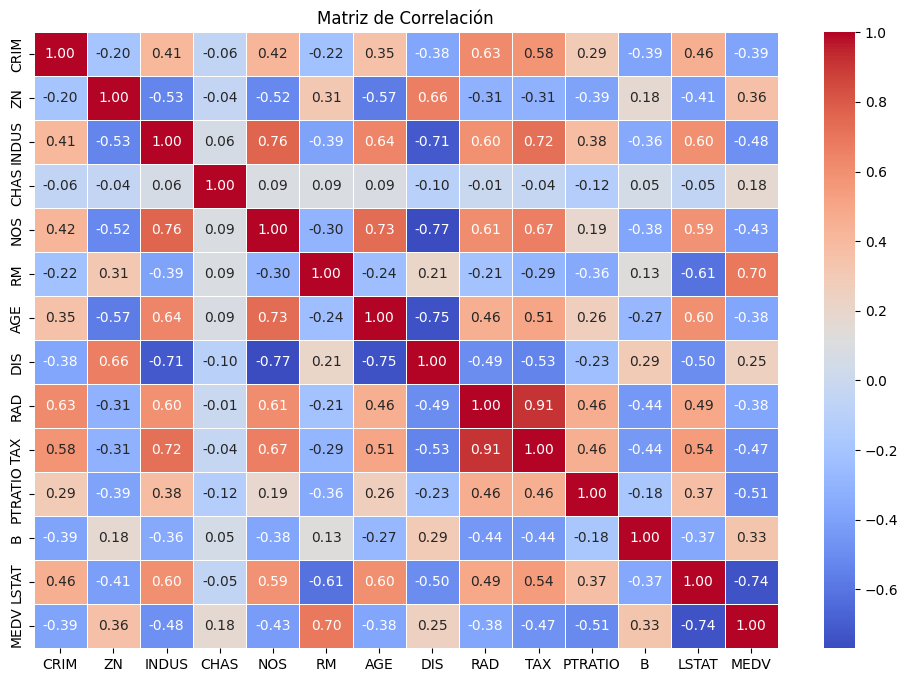

In [3]:
# Matriz de correlación
matriz_correlacion = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Este diagrama de correlación nos facilitará la identificación de relaciones lineales entre las variables. De esta manera, podemos visualizar qué características presentan una correlación positiva o negativa significativa con la variable objetivo 'MEDV'.
Podemos observar que las relaciones mas fuertes son:
- 'MEDV' y 'LSTAT' una correlación negativa de -0.74
- 'MEDV' y 'RM' una correlación positiva de 0.70

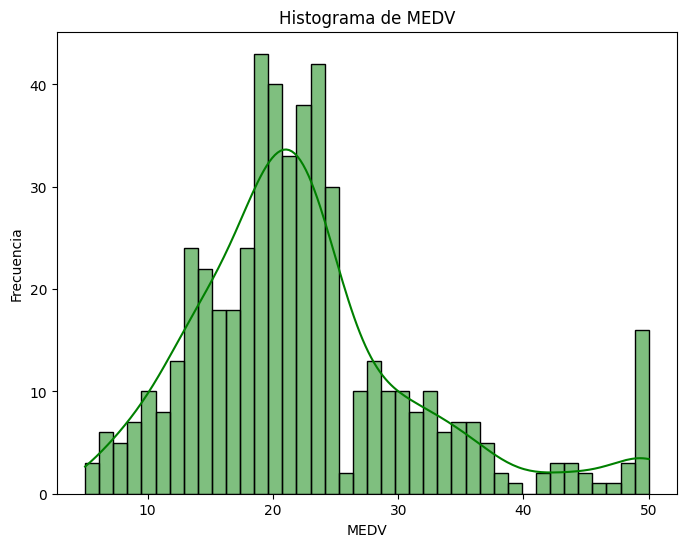

In [12]:
# Histograma de la variable 'MEDV' (variable a predecir)

plt.figure(figsize=(8,6))
sns.histplot(df['MEDV'], bins=40, kde=True, color='green')
plt.title('Histograma de MEDV')
plt.xlabel('MEDV')
plt.ylabel('Frecuencia')
plt.show()

Este histograma proporciona una visión de la distribución de los valores de 'MEDV', permitiéndonos identificar el tipo de distribución que caracteriza a la variable objetivo.

Ahora veremos el gráfico de dispersión de la de la variable 'MEDV' con:

RM: Es probable que el número promedio de habitaciones en una vivienda esté relacionado con el valor medio de las propiedades.

LSTAT: La proporción de población de estatus más bajo en una zona también puede influir en el valor medio de las propiedades.

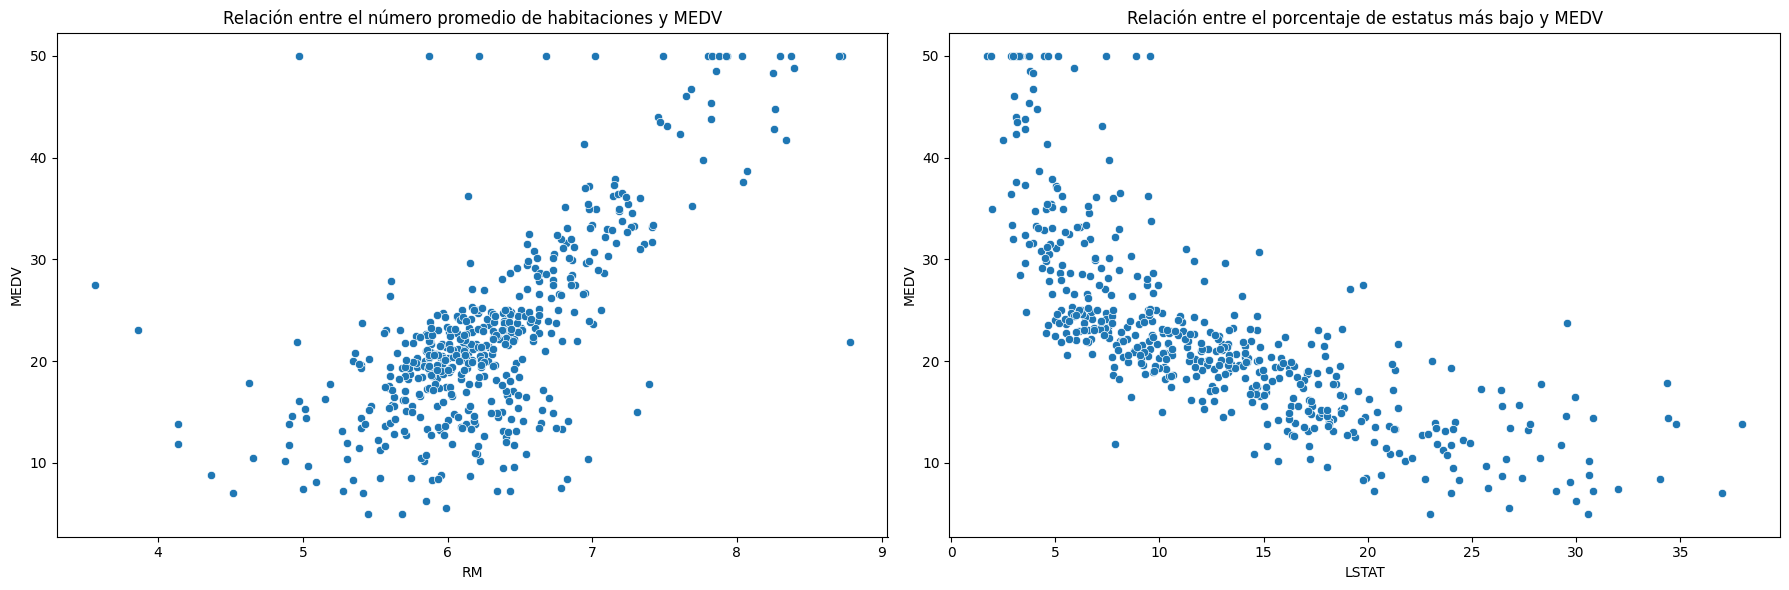

In [28]:
plt.figure(figsize=(18, 6))

# Primer gráfico
plt.subplot(1, 2, 1)
sns.scatterplot(x='RM', y='MEDV', data=df)
plt.title('Relación entre el número promedio de habitaciones y MEDV')

# Segundo gráfico
plt.subplot(1, 2, 2)
sns.scatterplot(x='LSTAT', y='MEDV', data=df)
plt.title('Relación entre el porcentaje de estatus más bajo y MEDV')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Modelos

In [18]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [19]:
# Dividir los datos en características (X) y la variable objetivo (y)
X = df.drop('MEDV', axis=1)  # Características
y = df['MEDV']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Calcular métricas
mae_linear = mean_absolute_error(y_test, y_pred)
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = np.sqrt(mse_linear)  # RMSE es la raíz cuadrada de MSE
var_score_linear = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae_linear}')
print(f'Mean Squared Error (MSE): {mse_linear}')
print(f'Root Mean Squared Error (RMSE): {rmse_linear}')
print(f'R^2 Score: {var_score_linear}')

Mean Absolute Error (MAE): 3.189091965887837
Mean Squared Error (MSE): 24.291119474973478
Root Mean Squared Error (RMSE): 4.928602182665332
R^2 Score: 0.6687594935356326


In [22]:
# Modelo de regresión LASSO
modelo_lasso = Lasso(alpha=1.0)  # Puedes ajustar el valor de alpha según sea necesario
modelo_lasso.fit(X_train, y_train)
y_pred_lasso = modelo_lasso.predict(X_test)

# Calcular métricas
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)  # RMSE es la raíz cuadrada de MSE
var_score_lasso = r2_score(y_test, y_pred_lasso)

print(f'Mean Absolute Error (MAE): {mae_lasso}')
print(f'Mean Squared Error (MSE): {mse_lasso}')
print(f'Root Mean Squared Error (RMSE): {rmse_lasso}')
print(f'R^2 Score: {var_score_lasso}')

Mean Absolute Error (MAE): 3.2535397673681614
Mean Squared Error (MSE): 24.409489761299707
Root Mean Squared Error (RMSE): 4.940596093721861
R^2 Score: 0.6671453631686304


In [23]:
# Modelo de regresión Ridge
modelo_ridge = Ridge(alpha=1.0)  # Puedes ajustar el valor de alpha según sea necesario
modelo_ridge.fit(X_train, y_train)
y_pred_ridge = modelo_ridge.predict(X_test)

# Calcular métricas
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)  # RMSE es la raíz cuadrada de MSE
var_score_ridge = r2_score(y_test, y_pred_ridge)

print(f'Mean Absolute Error (MAE) - Ridge: {mae_ridge}')
print(f'Mean Squared Error (MSE) - Ridge: {mse_ridge}')
print(f'Root Mean Squared Error (RMSE) - Ridge: {rmse_ridge}')
print(f'R^2 Score - Ridge: {var_score_ridge}')

Mean Absolute Error (MAE) - Ridge: 3.1329474278055343
Mean Squared Error (MSE) - Ridge: 24.477191227708644
Root Mean Squared Error (RMSE) - Ridge: 4.94744289787246
R^2 Score - Ridge: 0.6662221670168523


In [24]:
# Modelo de Árbol de Decisión
modelo_arbol = DecisionTreeRegressor(random_state=42)
modelo_arbol.fit(X_train, y_train)
y_pred_arbol = modelo_arbol.predict(X_test)

# Calcular métricas
mae_arbol = mean_absolute_error(y_test, y_pred_arbol)
mse_arbol = mean_squared_error(y_test, y_pred_arbol)
rmse_arbol = np.sqrt(mse_arbol)  # RMSE es la raíz cuadrada de MSE
var_score_arbol = r2_score(y_test, y_pred_arbol)

print(f'Mean Absolute Error (MAE) - Árbol de Decisión: {mae_arbol}')
print(f'Mean Squared Error (MSE) - Árbol de Decisión: {mse_arbol}')
print(f'Root Mean Squared Error (RMSE) - Árbol de Decisión: {rmse_arbol}')
print(f'R^2 Score - Árbol de Decisión: {var_score_arbol}')

Mean Absolute Error (MAE) - Árbol de Decisión: 2.394117647058824
Mean Squared Error (MSE) - Árbol de Decisión: 10.416078431372549
Root Mean Squared Error (RMSE) - Árbol de Decisión: 3.2273949915330395
R^2 Score - Árbol de Decisión: 0.8579634380978161


- Errores absolutos medios (MAE): Un MAE más bajo indica mejor rendimiento, por lo que el Árbol de Decisión tiene el valor más bajo (2.394), seguido por Ridge (3.133), Lineal (3.189) y Lasso (3.254).

- Errores cuadráticos medios (MSE) y errores cuadráticos medios de la raíz (RMSE): Nuevamente, valores más bajos son mejores. El Árbol de Decisión tiene el MSE y RMSE más bajos.

- R^2 Score: Un R^2 más cercano a 1 indica un mejor ajuste del modelo. Aquí, el Árbol de Decisión tiene el R^2 más alto (0.858).


En general, parece que el Árbol de Decisión tiene el mejor rendimiento en todas las métricas proporcionadas. Sin embargo, se debe tener en cuenta que la elección del modelo también puede depender de otros factores, como la interpretabilidad del modelo, la simplicidad y la capacidad de generalización a nuevos datos.

## <font color='blue'>**Set de Datos Fake News**</font>

Inspiración
¿Se puede usar este dataset para generar un algoritmo que identifique "fake news" y "real news"?

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

**Referencias**

*   Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018.
*   Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).






Revise los datos que se encuentran en el archivo **Dataset_fakenews.zip**. Realice un analisis descriptivo de los datos, genere las transformaciones necesarias para preparar su dataset para algoritmos de clasificacion y pruebe con todos los modelos de clasificacion revisados en clases. Optimice los parametros de su algoritmo y reporte el F1-score de 20 corridas experimentales con 5 fold cross validation.

Explique sus decisiones, genere visualizaciones y conclusiones.

In [ ]:
# Solución

## <font color='blue'>**Set de Datos Tarjetas de Créditos**</font>

Utilizaremos un conjunto de datos real de transacciones anónimas con tarjetas de crédito realizadas por titulares de tarjetas europeos a partir de septiembre de 2013. Estas transacciones están etiquetadas como fraudulentas o genuinas, y el objetivo es crear una solución de detección de fraudes utilizando el aprendizaje automático para predecir las etiquetas correctas para nuevas instancias.
Este conjunto de datos está muy desequilibrado. De las 284.807 transacciones, solo 492 son fraudulentas (0,172%). Este bajo porcentaje de fraude es bastante típico de las transacciones con tarjeta de crédito. Hay 28 variables, todas ellas numéricas, y no hay variables categóricas. Estas variables no son las características originales, sino el resultado de un análisis de componentes principales.

Para lidiar con datasets desbalanceados se recomienda utilizar la libreria imblearn. En ella hay varios metodos para balancear los datos. Existe un método de submuestreo y otro de sobremuestreo (SMOTE).

In [ ]:
import imblearn

# Utilice dataset credit_card.txt

Funciones para Over y Subsampling.

In [ ]:
#oversample = SMOTE()
#under = RandomUnderSampler(sampling_strategy=0.5)
#X, y = oversample.fit_resample(X, y)

Pipeline en donde se hacen los 2 métodos a la vez.

In [ ]:
# define pipeline
#over = SMOTE(sampling_strategy=0.1)
#under = RandomUnderSampler(sampling_strategy=0.5)
#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)
# transform the dataset
#X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
#counter = Counter(y)
#print(counter)